# ASSIGNMENT 2

### Tushank Arora - 22049242
### Gauri Ratawal- 22032967
### Abhishek Gowda - 22027504
### Gurleen Kaur Gill - 22041303

# Declaration

**By including this statement, we the authors of this work, verify that:**
    
    **I hold a copy of this assignment that we can produce if the original is lost or damaged.
    
    **I hereby certify that no part of this assignment/product has been copied from any other student’s work or from any other source except where due acknowledgement is made in the assignment.
    
    **No part of this assignment/product has been written/produced for us by another person except where such collaboration has been authorised by the subject lecturer/tutor concerned.
    
    **I am aware that this work may be reproduced and submitted to plagiarism detection software programs for the purpose of detecting possible plagiarism (which may retain a copy on its database for future plagiarism checking).
    
    **I hereby certify that we have read and understand what the School of Computer, Data and Mathematical Sciences defines as minor and substantial breaches of misconduct as outlined in the learning guide for this unit.

## Reading the Libraries
Loading the libraries and importing the required packages

In [94]:
import pandas as pd
import numpy as np
import os
import warnings 
warnings.filterwarnings("ignore")

# figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve,auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns

### Reading the dataset 

In [2]:
data = pd.read_csv("USFlooddata.csv")
data.shape

(698507, 26)

 From the shape it is clear that there are 698507 values inside 26 variables. Now let us look inside the variables to check the type of the values and what the values are trying to describe.

In [3]:
data.head()

,ID,DATE_BEGIN,DATE_END,DURATION,LON,LAT,COUNTRY,STATE,LOCATION,AREA,...,SOURCE_ID,DESCRIPTION,slope,dem,LULC,DISTANT_RIVER,CONT_AREA,DEPTH,year,geometry
0,0,199610211400,199610211400,0.0,-96.350956,35.846673,United States of America,OKLAHOMA,BRYAN,NaN,...,5570362,Flash flood waters washed out a small bridge a...,0.981851,250.0,126.0,0.449685,0.056706,NaN,1996.0,NaN
1,1,199601241700,199601241700,0.0,-86.728891,39.020047,United States of America,INDIANA,FAYETTE,NaN,...,5536059,"On the 23rd, many areas received around an inc...",1.232995,251.0,30.0,11.573957,1.323704,NaN,1996.0,NaN
2,2,199601221200,199601311659,9.0,-85.759407,38.254238,United States of America,KENTUCKY,HARDIN,NaN,...,5549485,Snowmelt and heavy rain caused widespread floo...,3.993053,145.0,50.0,0.902991,0.049660,NaN,1996.0,NaN
3,3,199601270430,199601271130,0.0,-82.568268,35.577000,United States of America,NORTH CAROLINA,HENDERSON,NaN,...,5537263,Prolonged rain became heavier following the ic...,18.991732,615.0,126.0,0.000000,113.593987,NaN,1996.0,NaN
4,4,199601191330,199601201200,0.0,NaN,NaN,United States of America,NEW YORK,BROOME,NaN,...,5583210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,NaN


To be more clear we use info function to check the datatype of the variable.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698507 entries, 0 to 698506
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             698507 non-null  int64  
 1   DATE_BEGIN     698506 non-null  object 
 2   DATE_END       693352 non-null  object 
 3   DURATION       693532 non-null  float64
 4   LON            672424 non-null  float64
 5   LAT            672423 non-null  float64
 6   COUNTRY        698507 non-null  object 
 7   STATE          698110 non-null  object 
 8   LOCATION       144579 non-null  object 
 9   AREA           94907 non-null   float64
 10  FATALITY       14078 non-null   float64
 11  DAMAGE         144462 non-null  float64
 12  SEVERITY       695 non-null     float64
 13  SOURCE         131241 non-null  object 
 14  CAUSE          89692 non-null   object 
 15  SOURCE_DB      698507 non-null  object 
 16  SOURCE_ID      693580 non-null  object 
 17  DESCRIPTION    126548 non-nul

From the info it is clear that the dataset includes float, object and int values, where only ID is the only integer variable. All the categorical variables such as DATE_END, DATE_BEGIN, COUNTRY,STATE, LOCATION, SOURCE,CAUSE, SOURCE_DB, SOURCE_ID, DESCRIPTION are of object type andd rest of the columns are the float variables.

Using describe function we can check the overall description of the dataset such as their overall count, mean, standard deviation, minimum and maximum value as well the quantile range of the values.

In [5]:
data.describe()

,ID,DURATION,LON,LAT,AREA,FATALITY,DAMAGE,SEVERITY,slope,dem,LULC,DISTANT_RIVER,CONT_AREA,DEPTH,year
count,698507.000000,693532.000000,672424.000000,672423.000000,9.490700e+04,14078.000000,1.444620e+05,695.000000,671846.000000,671456.000000,672322.000000,672376.000000,525731.000000,66456.000000,156543.000000
mean,349684.973163,9.009446,-88.783749,38.508979,8.372440e+02,1.161244,1.106862e+06,1.301439,4.118608,315.750082,87.314821,2.954255,188.074676,9.389885,2009.544885
std,201249.908366,20.554316,14.263698,4.663014,1.401497e+04,30.696143,5.855600e+07,0.407244,5.277307,404.672497,38.740177,71.246652,3305.339278,8.359899,7.250662
min,0.000000,0.000000,-171.032700,-46.436573,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,-83.000000,20.000000,0.000000,0.004820,0.010000,1903.000000
25%,180388.500000,1.000000,-94.820833,35.575450,8.042477e+00,0.000000,0.000000e+00,1.000000,1.155240,111.000000,50.000000,0.296569,0.925694,3.210000,2004.000000
50%,349254.000000,3.000000,-85.620833,38.954167,3.216991e+01,0.000000,0.000000e+00,1.000000,2.193040,208.000000,114.000000,1.060791,3.717239,6.690000,2010.000000
75%,523880.500000,8.000000,-79.004167,41.454167,1.286796e+02,0.000000,5.500000e+03,1.500000,4.683085,316.000000,116.000000,2.309126,15.965580,13.040000,2016.000000
max,698507.000000,1120.000000,174.100320,71.387113,1.216616e+06,3006.000000,1.000010e+10,2.000000,65.035576,4301.000000,200.000000,4601.343743,369369.031250,30.000000,2020.000000


Now we will check the total number of null values inside the variables using the function *isnull()*

In [6]:
data.isnull().sum()

ID                    0
DATE_BEGIN            1
DATE_END           5155
DURATION           4975
LON               26083
LAT               26084
COUNTRY               0
STATE               397
LOCATION         553928
AREA             603600
FATALITY         684429
DAMAGE           554045
SEVERITY         697812
SOURCE           567266
CAUSE            608815
SOURCE_DB             0
SOURCE_ID          4927
DESCRIPTION      571959
slope             26661
dem               27051
LULC              26185
DISTANT_RIVER     26131
CONT_AREA        172776
DEPTH            632051
year             541964
geometry         156415
dtype: int64

After checking the null values, it is clear that *area, severity, fatality, cause, depth* have more than 90% null values inside them. Therefore, we need to drop these variables before building the models as we can't predict the values inside these variables because of the insuffiencient data present for them.

Also, the variables that are not nessesary for the working of the models are going to be dropped as follows:

In [7]:
data = data.drop(columns = ["ID", "DESCRIPTION","LOCATION", "COUNTRY", "SEVERITY", "FATALITY", "AREA", 
 "DEPTH", "geometry", "CAUSE", "SOURCE_DB","SOURCE_ID", "SOURCE", "STATE"], axis = 1)

Now, checking the dataset information after removing the coulmns that are not required:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698507 entries, 0 to 698506
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DATE_BEGIN     698506 non-null  object 
 1   DATE_END       693352 non-null  object 
 2   DURATION       693532 non-null  float64
 3   LON            672424 non-null  float64
 4   LAT            672423 non-null  float64
 5   DAMAGE         144462 non-null  float64
 6   slope          671846 non-null  float64
 7   dem            671456 non-null  float64
 8   LULC           672322 non-null  float64
 9   DISTANT_RIVER  672376 non-null  float64
 10  CONT_AREA      525731 non-null  float64
 11  year           156543 non-null  float64
dtypes: float64(10), object(2)
memory usage: 64.0+ MB


Checking and removing duplicate values as we do not want our models to keep analysing the same variable all over again and again.

In [9]:
duplicates = data[data.duplicated()]
data = data.drop_duplicates()

Dropping the duplicate values directly impact the size of the dataset therefore we need to reset the index to create the proper indexing of the data values inside the dataset

In [10]:
data = data.reset_index(drop=True)

After reseting the index, we check the description of the dataset 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688566 entries, 0 to 688565
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DATE_BEGIN     688565 non-null  object 
 1   DATE_END       683651 non-null  object 
 2   DURATION       683832 non-null  float64
 3   LON            665855 non-null  float64
 4   LAT            665854 non-null  float64
 5   DAMAGE         134769 non-null  float64
 6   slope          665291 non-null  float64
 7   dem            664969 non-null  float64
 8   LULC           665760 non-null  float64
 9   DISTANT_RIVER  665814 non-null  float64
 10  CONT_AREA      519586 non-null  float64
 11  year           146609 non-null  float64
dtypes: float64(10), object(2)
memory usage: 63.0+ MB


We can then plot the correlation matrix between all the columns to find the correlation between the features as follows:

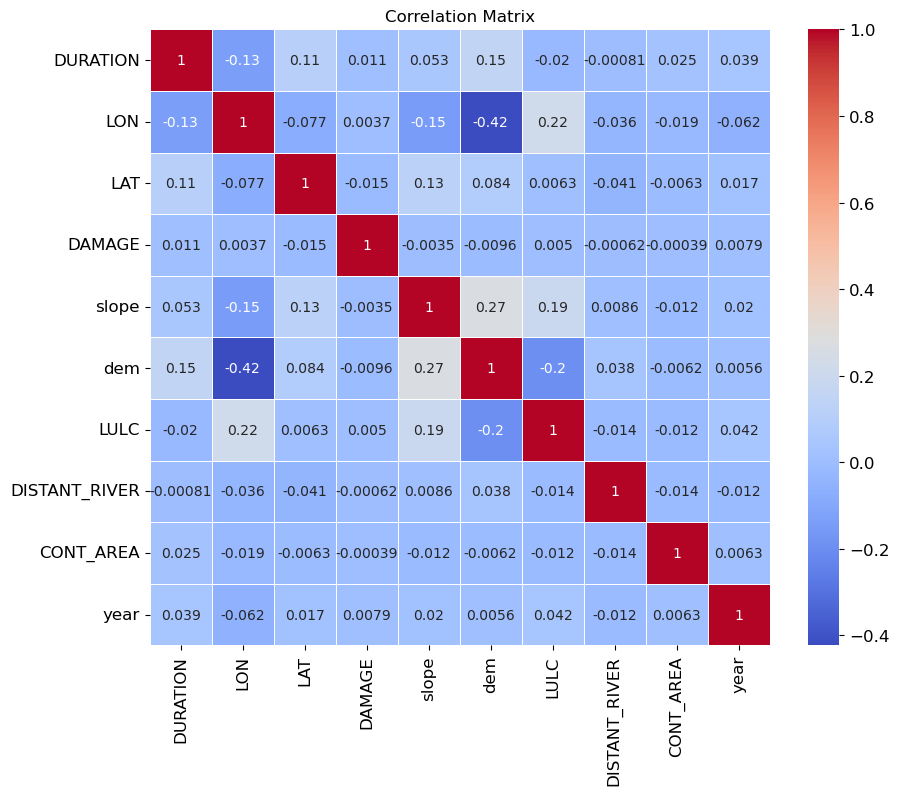

In [12]:
corr_matrix = data.corr() 

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidth=0.6)
plt.title("Correlation Matrix")
plt.show()

We will now drop the NA and null values from the dataset as the prediction of these variables will not give significant values. This is because the correlation between the variables, as observed from the plot, is extremely low. Therefore, it is better to remove these null values and then predicting from the remaining data.

In [13]:
data =  data.dropna()

After dropping the null values we will again check the sum of null values inside the variable to confirm if all the null values have been removed or not.

In [14]:
data.isnull().sum()

DATE_BEGIN       0
DATE_END         0
DURATION         0
LON              0
LAT              0
DAMAGE           0
slope            0
dem              0
LULC             0
DISTANT_RIVER    0
CONT_AREA        0
year             0
dtype: int64

After removing null values, we will again reset the indexes

In [15]:
data = data.reset_index()
data.head()

,index,DATE_BEGIN,DATE_END,DURATION,LON,LAT,DAMAGE,slope,dem,LULC,DISTANT_RIVER,CONT_AREA,year
0,0,199610211400,199610211400,0.0,-96.350956,35.846673,0.0,0.981851,250.0,126.0,0.449685,0.056706,1996.0
1,1,199601241700,199601241700,0.0,-86.728891,39.020047,0.0,1.232995,251.0,30.0,11.573957,1.323704,1996.0
2,2,199601221200,199601311659,9.0,-85.759407,38.254238,0.0,3.993053,145.0,50.0,0.902991,0.049660,1996.0
3,3,199601270430,199601271130,0.0,-82.568268,35.577000,0.0,18.991732,615.0,126.0,0.000000,113.593987,1996.0
4,11,199601122200,199601130400,0.0,-71.270569,41.552253,0.0,2.505975,33.0,80.0,0.311779,0.033131,1996.0


Coverting the date object into date format and extract month out of the begin date

#### Data Visualising

To visualise the data we begin with plotting the density plots of each variable.

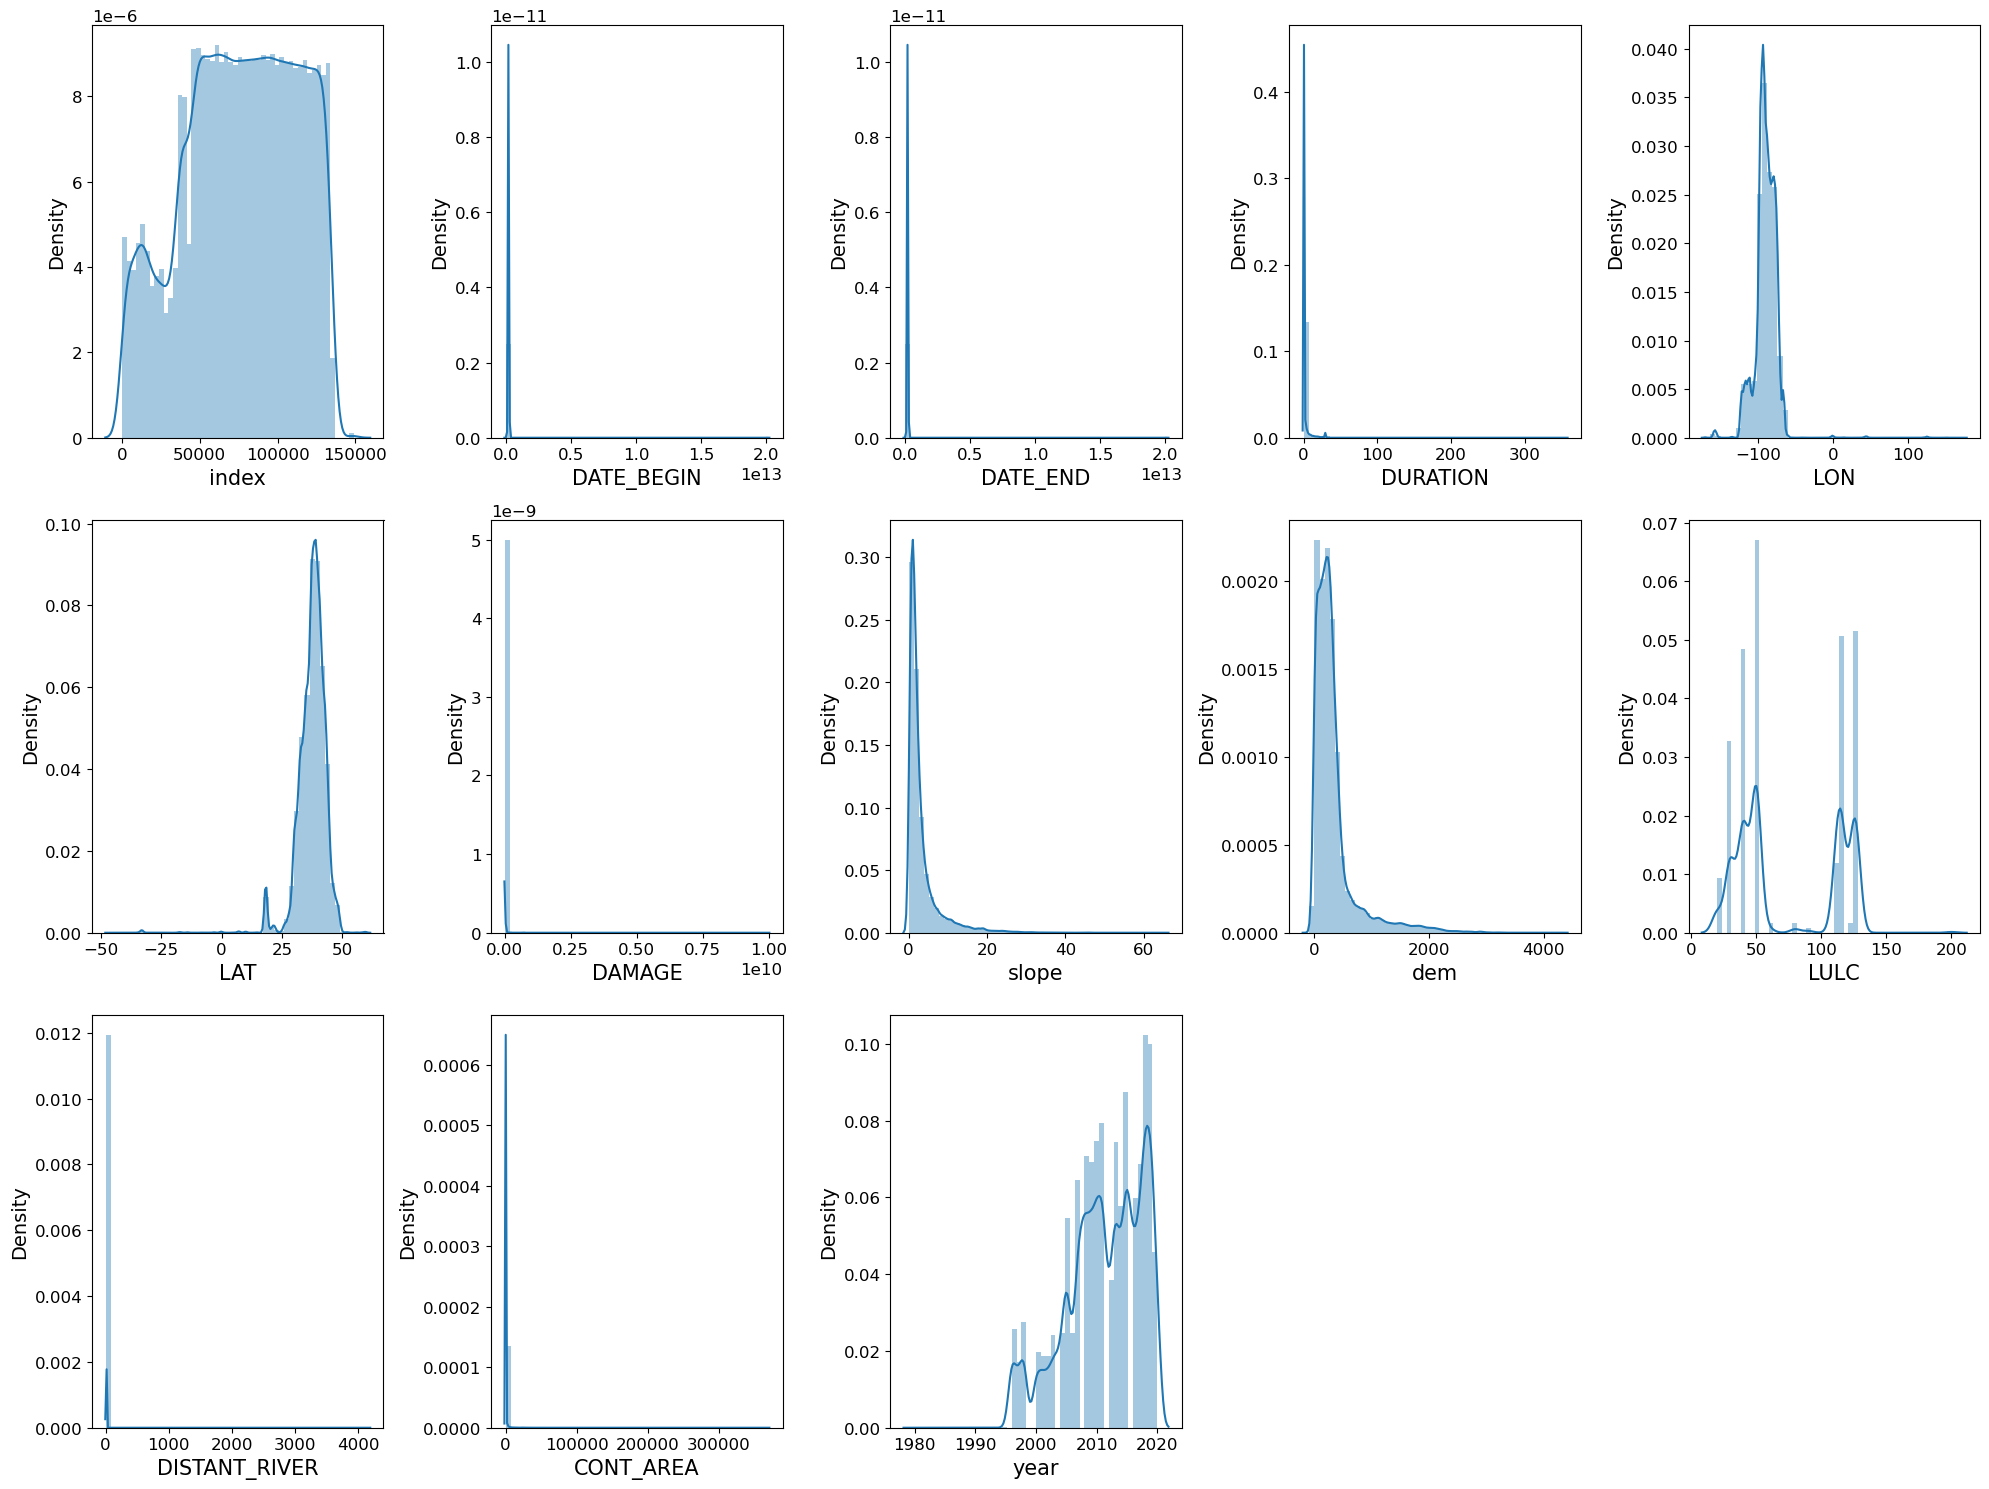

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

From the above plots it can be understood that the values are not normally distributed among the columns but are either right skewed or left skewed.

In [17]:
data['DATE_BEGIN'] = pd.to_datetime(data['DATE_BEGIN'])
data['DATE_END'] = pd.to_datetime(data['DATE_END'])
data['DATE_BEGIN'] = data['DATE_BEGIN'].dt.normalize() 
data['DATE_END'] = data['DATE_END'].dt.normalize() 
data['month'] = data['DATE_BEGIN'].dt.month

Extraction of the month is done so that we can delete the beginning and the end date of the flood as we are given with the duration of the flood and we can justify the duration of flood in different months as well as different years.

In [18]:
data.drop(columns = ["DATE_BEGIN", 'DATE_END'], axis = 1)

,index,DURATION,LON,LAT,DAMAGE,slope,dem,LULC,DISTANT_RIVER,CONT_AREA,year,month
0,0,0.0,-96.350956,35.846673,0.0,0.981851,250.0,126.0,0.449685,0.056706,1996.0,10
1,1,0.0,-86.728891,39.020047,0.0,1.232995,251.0,30.0,11.573957,1.323704,1996.0,1
2,2,9.0,-85.759407,38.254238,0.0,3.993053,145.0,50.0,0.902991,0.049660,1996.0,1
3,3,0.0,-82.568268,35.577000,0.0,18.991732,615.0,126.0,0.000000,113.593987,1996.0,1
4,11,0.0,-71.270569,41.552253,0.0,2.505975,33.0,80.0,0.311779,0.033131,1996.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
100679,148835,2.0,-85.095833,42.562500,200500.0,2.097805,263.0,126.0,1.715936,1.342008,1998.0,1
100680,148856,2.0,-85.095833,42.562500,300.0,2.097805,263.0,126.0,1.715936,1.342008,1999.0,1
100681,148866,2.0,-85.095833,42.562500,166000.0,2.097805,263.0,126.0,1.715936,1.342008,2000.0,1
100682,148889,3.0,-85.095833,42.562500,20000.0,2.097805,263.0,126.0,1.715936,1.342008,2000.0,1


Now, we will choose those values of damage which actually quantify to some damage. For that, we choose the columns with damage not equals to zero.
As the damage equals to zero is not helpful.

In [19]:
data = data.loc[data['DAMAGE']!=0] 

Creating the dummies of the date as from original month give output as individual integer value of month whereas months should be in class of 12 months.

In [20]:
data['month'] = str(data['month'])
data['month'] = pd.get_dummies(data['month'])

After converting the months into our desired type, we check the information of the model last time in order to analyse whether the dataset needs further pre processing.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37028 entries, 7 to 100683
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          37028 non-null  int64         
 1   DATE_BEGIN     37028 non-null  datetime64[ns]
 2   DATE_END       37028 non-null  datetime64[ns]
 3   DURATION       37028 non-null  float64       
 4   LON            37028 non-null  float64       
 5   LAT            37028 non-null  float64       
 6   DAMAGE         37028 non-null  float64       
 7   slope          37028 non-null  float64       
 8   dem            37028 non-null  float64       
 9   LULC           37028 non-null  float64       
 10  DISTANT_RIVER  37028 non-null  float64       
 11  CONT_AREA      37028 non-null  float64       
 12  year           37028 non-null  float64       
 13  month          37028 non-null  uint8         
dtypes: datetime64[ns](2), float64(10), int64(1), uint8(1)
memory usage: 4

Next, we find the correlation matrix after processing the data and removing the zero values of damage from the dataset.

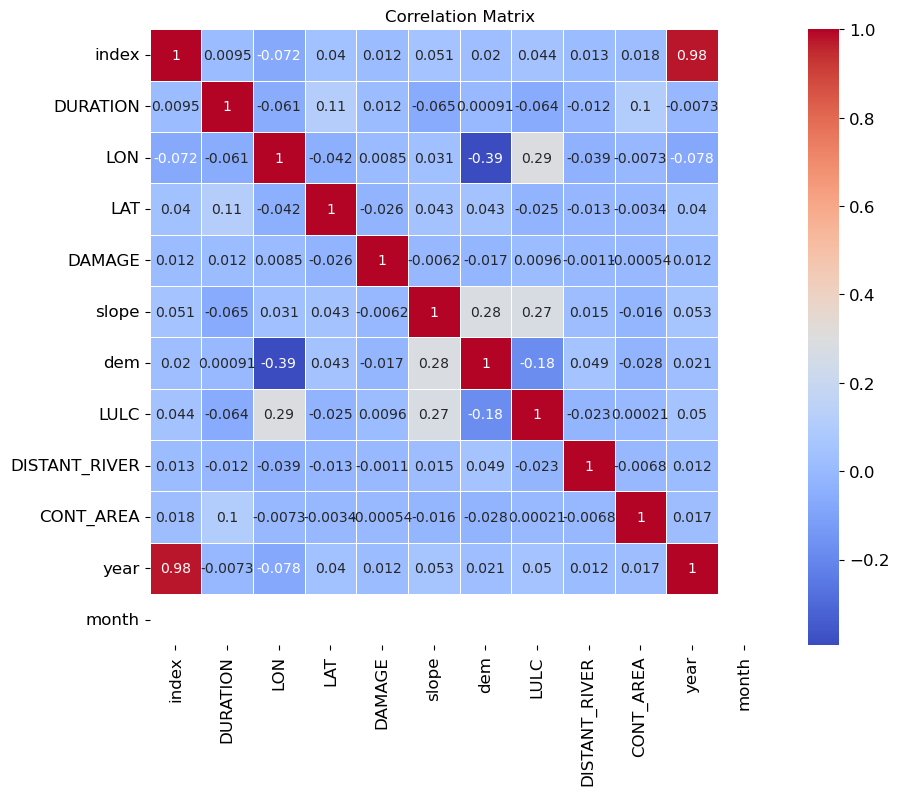

In [22]:
corr_matrix = data.corr() 

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidth=0.6)
plt.title("Correlation Matrix")
plt.show()

From the correlation matrix obtained after the pre-processing steps were applied, it is justified that the task is a **Classification Problem** not the regression, as the columns dependancy on each other is minimum.

On the basis of the data description, **Damage** (measured in US dollars) is selected as the target variable. Although, there is less correlation between variables, 'Damage' still seems like a better choice. It can help in predicting the ecomonic damage caused in an event of a flood with the help of other predictors which are more capable in describing the severity and likelihood of a flood.

#### Plotting the target variable Damage_Class with remaining columns

Plotting the scatter plot to check the correlation of each variable against the target variable.


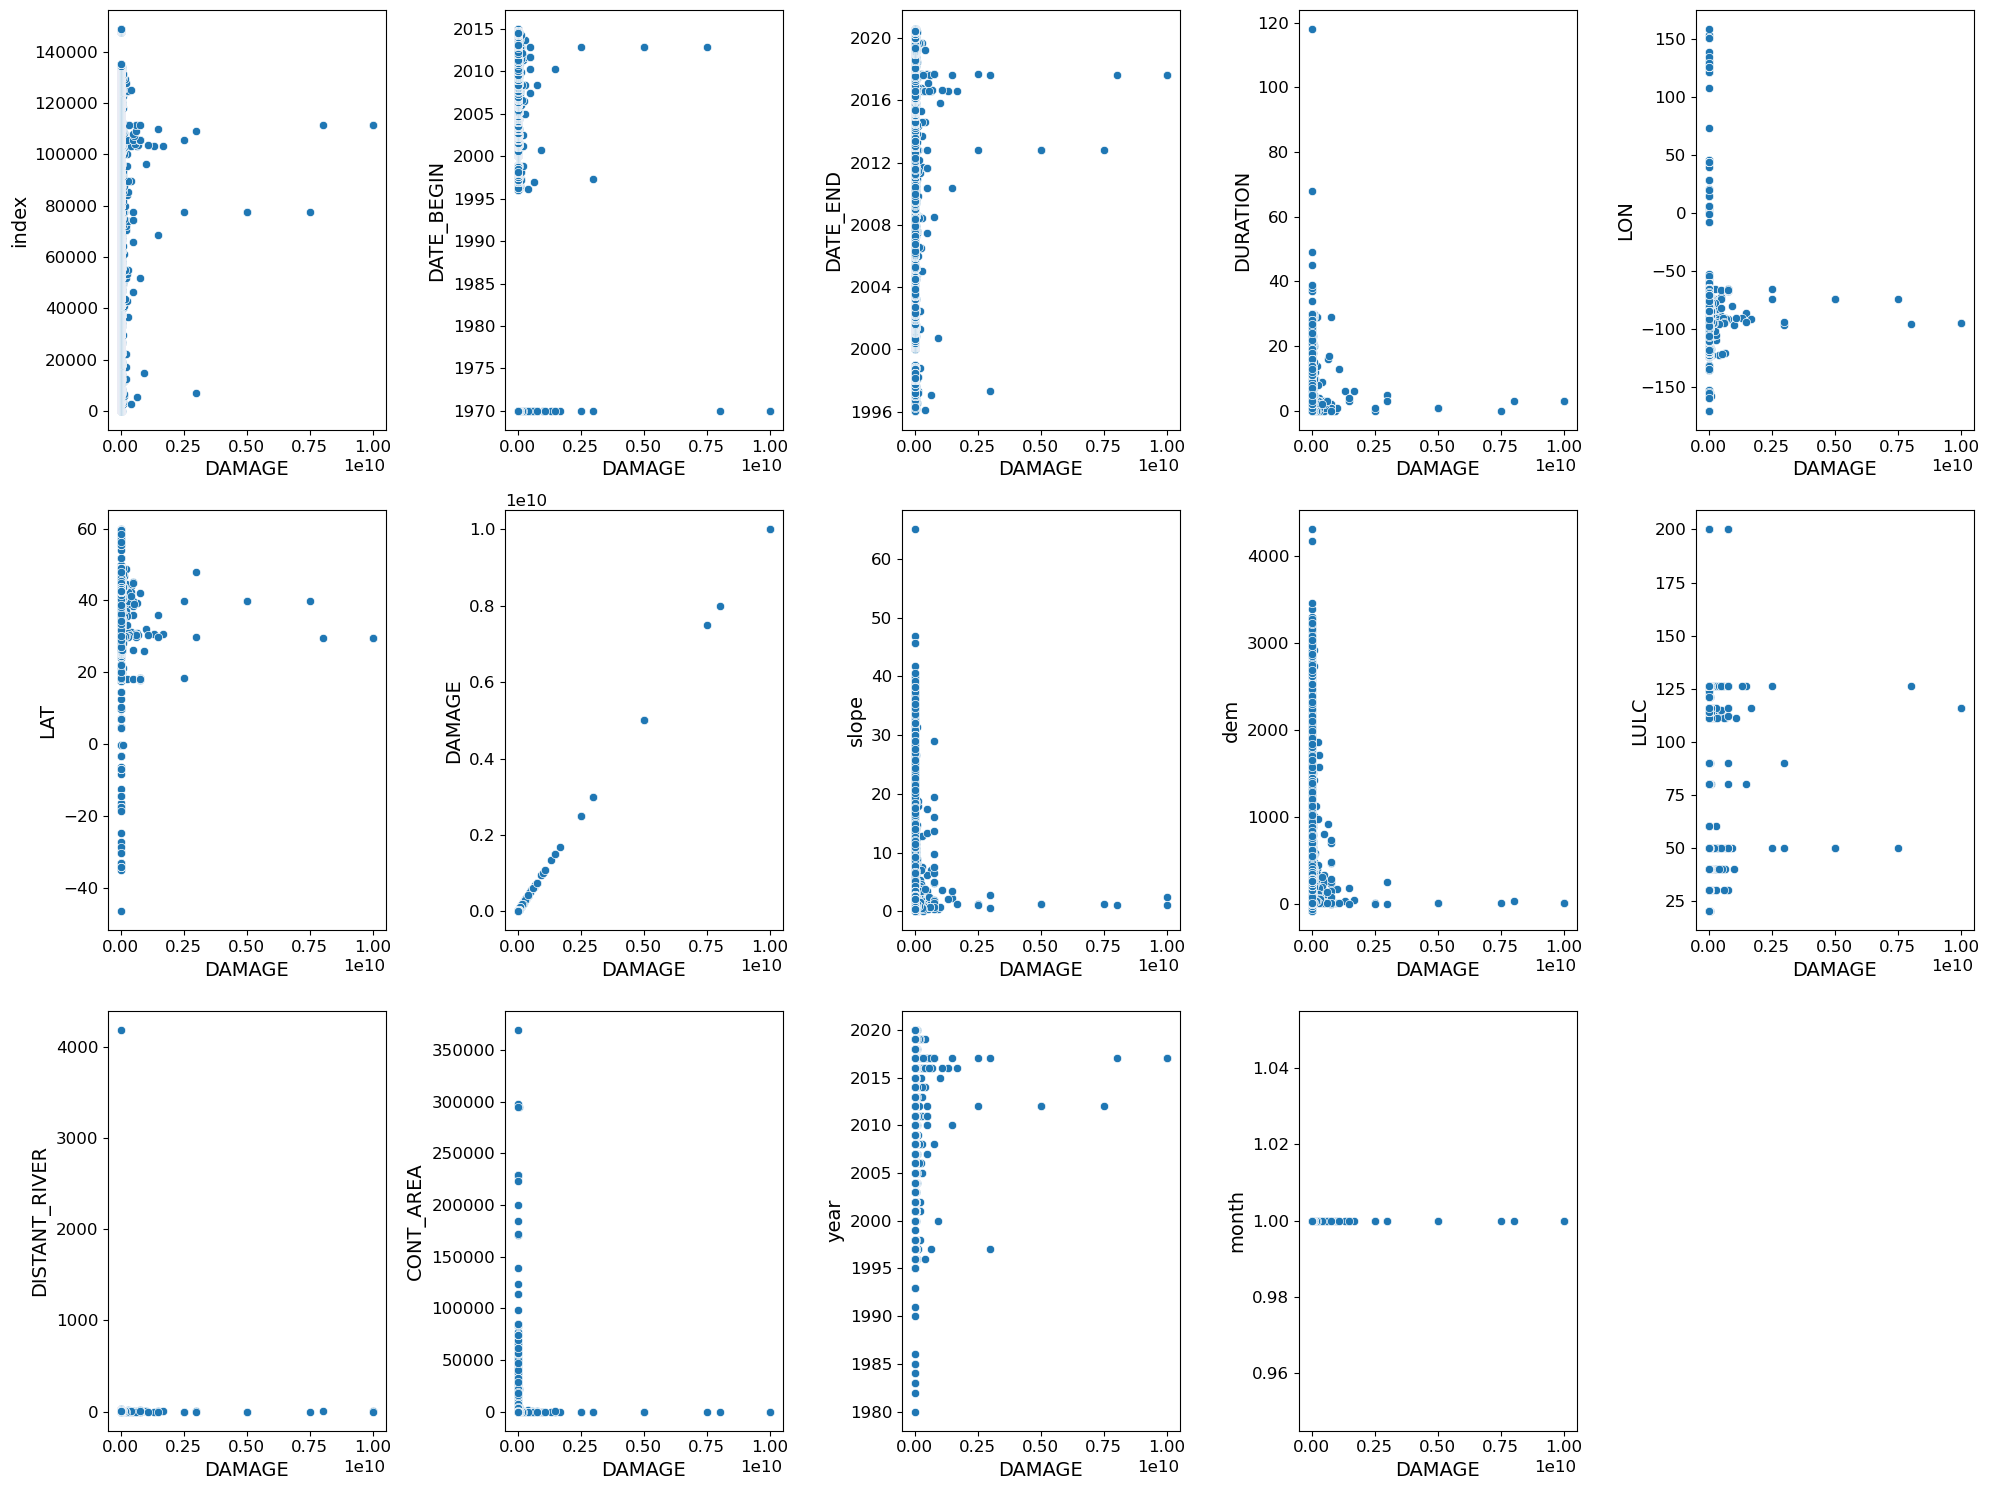

In [23]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = data['DAMAGE'], y = data[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

From the above plots it is clear that there is not much correlation between the variables with the target variable.

#### Classifing the Target Variable

Checking the median of the damage variable to check the distribution of the values before classifing them into two classes.

In [24]:
data['DAMAGE'].median()

20000.0

The classification of classes is done with the consideration of the highest value of the damage that is quite high. The values on the basis of which division is done is set to be $100000.

In [25]:
data['DAMAGE_CLASS'] = (data['DAMAGE'] >= 100000).astype(int)

Above code shows that if the damage after the flood in the region is less then $100000 then the demage is consider as not too high to recover but if the damage cost higher than it then it is consider as somehow high damage which needs high acknowledgement. 

After the distribution of the classes we visualise the distribution of the class with the help of histogram  

(array([25941.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11087.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

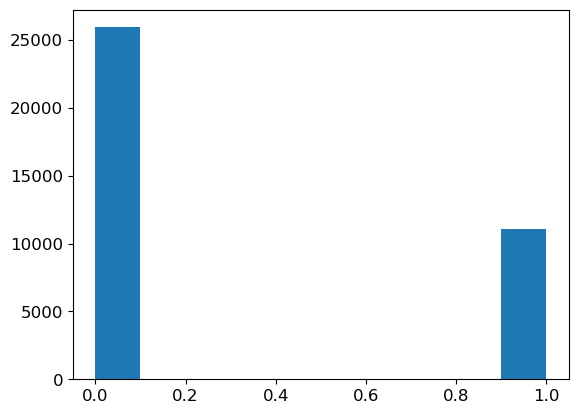

In [26]:
plt.hist(data['DAMAGE_CLASS'])

The distribution of the values inside the first class it much more higher than the second class. That shows high bias towards the first class therefore, to reduce the bias we will reduce the values inside the column

For reducing the values inside first class we first divide the different classes into different variables and reset there index

In [27]:
d1 = data.loc[data['DAMAGE_CLASS']==0]
d2 = data.loc[data['DAMAGE_CLASS']==1]

d1 = d1.reset_index(drop=True)
d2 = d2.reset_index(drop=True)


We build a function that choose 12000 random values from the first class and save it on the integer location in the variable.

In [28]:
np.random.seed(34)
index = np.random.randint(1, d1.shape[0], size = 12000)

d1 = d1.iloc[index]  # iloc - integer location 

After getting the random values for first class we concat both the variables containing different classes to the dataset.

In [29]:
Flooddata = pd.concat([d1, d2]) # attaching d1 and d2 rowwise 

After attaching the variables reseting of the final dataset is important to maintain the sequence inside the dataset.

In [30]:
Flooddata = Flooddata.reset_index()

After resting the index we gain check the distribution of classes of both the classes to check whether the bias get reduced or not.

(array([12000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11087.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

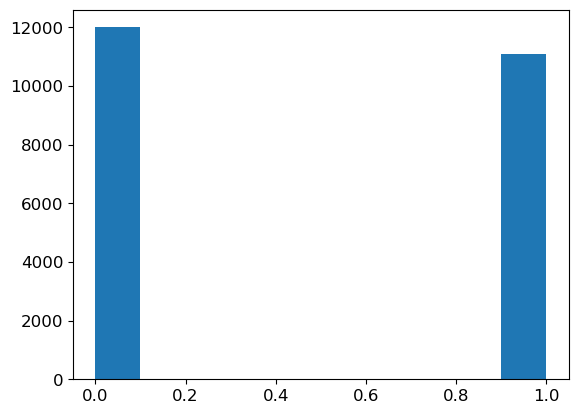

In [31]:
plt.hist(Flooddata['DAMAGE_CLASS'])

The distribution seems fair and the bias towards one class is reduced too. In next step we reduce the original variable damage that contains continuous values inside it as well as the index column.

In [32]:
Flooddata = Flooddata.drop(columns = ["DATE_BEGIN", "DATE_END","DAMAGE","index", "level_0"], axis = 1)

Checking the data again before starting of model building on the dataset.

In [33]:
Flooddata

,DURATION,LON,LAT,slope,dem,LULC,DISTANT_RIVER,CONT_AREA,year,month,DAMAGE_CLASS
0,0.0,-84.180000,39.750000,0.000000,230.0,50.0,1.445222,0.725465,2011.0,1,0
1,0.0,-91.450000,34.780000,2.633001,71.0,126.0,0.362087,0.104229,2007.0,1,0
2,0.0,-92.075700,42.642100,0.895555,303.0,40.0,2.244113,5.240671,2010.0,1,0
3,0.0,-77.459800,43.039100,1.800851,186.0,50.0,0.735259,0.331566,2018.0,1,0
4,1.0,-111.886798,40.759620,2.505164,1311.0,50.0,2.052996,1.732815,2004.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
23082,2.0,-84.970833,43.245833,2.618764,244.0,30.0,0.519041,6.715082,1998.0,1,1
23083,7.0,-84.970833,43.245833,2.618764,244.0,30.0,0.519041,6.715082,1998.0,1,1
23084,2.0,-85.095833,42.562500,2.097805,263.0,126.0,1.715936,1.342008,1998.0,1,1
23085,2.0,-85.095833,42.562500,2.097805,263.0,126.0,1.715936,1.342008,2000.0,1,1


The last step include of checking the variance of the variables to check the requirement of Standardization on the dataset.

In [34]:
Flooddata.var()

DURATION         2.853836e+01
LON              1.934738e+02
LAT              3.688484e+01
slope            2.156605e+01
dem              1.618200e+05
LULC             1.546471e+03
DISTANT_RIVER    9.310531e+00
CONT_AREA        3.034881e+07
year             3.823713e+01
month            0.000000e+00
DAMAGE_CLASS     2.496198e-01
dtype: float64

Variance justifies that the dataset do needs the standardization before we build the model.
Splitting of the data is done so that the standardization would be done on the train set and on test set with respect to the train set.

In [35]:
Flooddata.isnull().sum()

DURATION         0
LON              0
LAT              0
slope            0
dem              0
LULC             0
DISTANT_RIVER    0
CONT_AREA        0
year             0
month            0
DAMAGE_CLASS     0
dtype: int64

In [36]:
X = Flooddata.drop(columns= ['DAMAGE_CLASS'], axis = 1)
y = Flooddata['DAMAGE_CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The standardization make the means of the variables as 0 and the standard deviation as 1 for the variables.

In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL 1 - SUPPORT VECTOR MACHINE

Support Vector classifier is used to find the support vector classifier that separates the higher dimensional data into different groups. The different kernels helps to systematically find the margin that separates the different classes.

Firstly, we used the hyperparameter tunning with different eta values that explains that to classify the classes we get the soft margin or hard margin classifier. The softer the margin is the higher the chances of misclassification values.

C = 0.01, accuracy = 59.33304460805544
C = 0.1, accuracy = 59.37635339974015
C = 1, accuracy = 59.41966219142486
C = 10, accuracy = 59.46297098310958
C = 30, accuracy = 59.31139021221308
C = 60, accuracy = 59.26808142052836
C = 90, accuracy = 59.33304460805544
C = 120, accuracy = 59.26808142052836


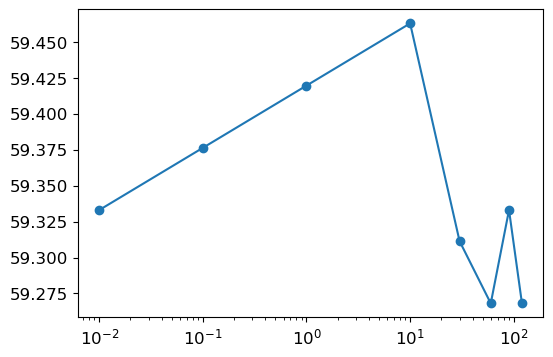

In [38]:
Margins = [0.01,0.1,1,10,30,60,90,120]
resAccuracy, resAccuracy2 = [], []
train_errors, test_errors = [], []

for m in Margins:
    svm_clf_cv = LinearSVC(C=m, loss="hinge", max_iter = 80000) # using iter=1e4
    svm_clf_cv.fit(X_train,y_train)
    y_pred = svm_clf_cv.predict(X_test)
    y_train_pred = svm_clf_cv.predict(X_train)
    accCurr = accuracy_score(y_test, y_pred)*100
    accCurr2 = accuracy_score(y_train, y_train_pred)*100
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_pred)
    print(f'C = {m}, accuracy = {accCurr}')
    resAccuracy.append(accCurr)
    train_errors.append(train_error)
    test_errors.append(test_error)
    resAccuracy2.append(accCurr2)

plt.figure(figsize=(6,4))
plt.xticks(Margins)
plt.semilogx(Margins, resAccuracy, 'o-')
plt.show()

From the above plot it is visible that the accuracy of the model for linear kernel first increase with increase in the c values but after c reaches one point the accuracy drastically decrease that gives us the value of c where model works best that is with c = 10.

We can also plot for the accuracy of test and train against the different c values that will give us a plot something as it is below:

Text(0, 0.5, 'Accuracy')

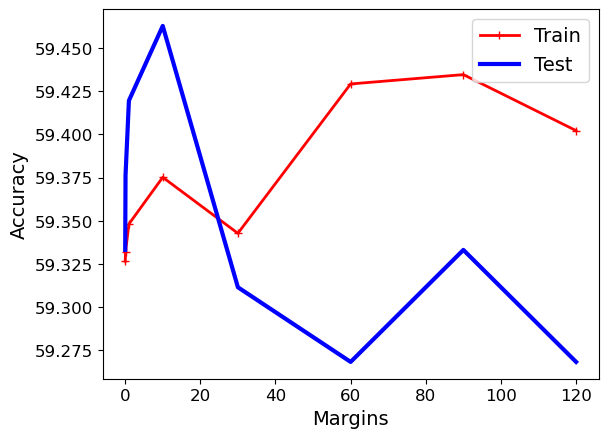

In [39]:
plt.plot(Margins, resAccuracy2,"r-+", linewidth=2, label="Train")
plt.plot(Margins, resAccuracy, "b-", linewidth=3, label="Test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Margins")
plt.ylabel("Accuracy")


The plot shows that the accuracy of the test set was higher in the beginning but it decreases after sometime while the accuracy of the train data was less to begin with as compare to the test data but it starts increasing as we increase the c value for the model.

Now we will plot the linear SVC model on the best parameters that we get after cross validating the data with different parameters.

In [46]:
svm = LinearSVC(C = 10)
svm.fit(X_train, y_train)

predict1 = svm.predict(X_test)

We can build the confusion matrix that will check the misclassified values of the model

In [48]:
confusion_matrix(y_test, predict1)

array([[1743,  662],
       [1208, 1005]], dtype=int64)

From the confusion matrix we can understand that there are 1870 values that are misclassified by the model that will give error while we predict the new values that are being entered in the dataset.

Now, to check the working of the model we will check the accuracy of the model.

In [49]:
svm.score(X_test, y_test)

0.5950627977479428

The accuracy that we get from the Linear SVC is nearly 60% that is not that helpful for predicting the values on the basis of the input variables, that means that our data is not linearly seperable and we should the model with different kernel tricks.

We can also build the AUC curve to check the performance by the model.

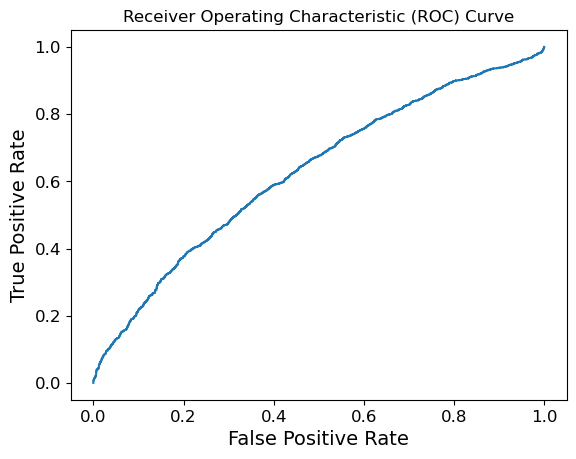

Area Under Curve (AUC): 0.6271870153026954


In [41]:
## AUC area:

from sklearn.metrics import roc_curve, roc_auc_score

# Get decision scores for the Positive class (1)
decision_scores = svm.decision_function(X_test)

# Convert decision scores into probabilities
probabilities = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Calculate the AUC
auc = roc_auc_score(y_test, probabilities)
print('Area Under Curve (AUC):', auc)

From the AUC curve it is clear that 62.7% of the data is under the curve of the model that is the actual performance of the model, while rest of the data is not correctly predicted by the created model.

#### The Second model that we build is with radial kernel 
The model will build the hyperplane for the model on infinite dimension on the basis of different gamma values. Gamma will be used as the cross validation method as on the basis of different gamma values the performance of the model depends.

In [42]:
parameters_1 = {'C':[0.1,1,10,20,30], "kernel" : ["rbf"], "gamma" : ["scale", "auto"]}
svc_1 = SVC()
clf_1 = GridSearchCV(svc_1, parameters_1, cv = 5)

clf_1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 30], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']})

Now we will find the best parameters to work on the building of the radial kernel model.

In [43]:
clf_1.best_score_
clf_1.best_params_

{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}

On the basis of the different best parameters after cross validation we will build the model that gives us the best performance.

In [44]:
rad_svm = SVC(C = clf_1.best_params_['C'], gamma = 'auto')
rad_svm.fit(X_train, y_train)

predict = rad_svm.predict(X_test)



0.6548289302728454

On the basis of the fitted model we find the confusion matrix that give the number of values that are misclassied by the data.

In [50]:
confusion_matrix(y_test, predict)

array([[1849,  556],
       [1038, 1175]], dtype=int64)

From the confusion matrix we can understand that there are 1594 values that are misclassified by the model that will give error while we predict the new values that are being entered in the dataset.

We will check the performance of the model by checking the accuracy of the data.

In [51]:
rad_svm.score(X_test, y_test)

0.6548289302728454

After checking the model accuracy it is clear that the model perform with 65.50% accracy which is higher as compare to the working efficiency of linear SVC model. 

To check if we can still get better model on polynomial kernel we build another model with kernel as polynomial that will cross validate the model on the basis of different degree values.

**The polynomial kernel is begin avoided to build as the kernel takes more than 60 minutes to run that exceeds the performance time limit on higher level.**

#### Comparing the three kernels

We can plot the graph of the false positive and true positive rate of the values, that compares the accuracy of the model with ROC curve.

In [74]:
# calculatting precision recall curve for all models
svm_precission, svm_recall, threshold = precision_recall_curve(y_test, predict1)
rad_svm_precission, rad_svm_recall, threshold = precision_recall_curve(y_test, predict)

# extract AUC value
svm_auc = auc(svm_recall, svm_precission)
rad_svm_auc = auc(rad_svm_recall, rad_svm_precission)

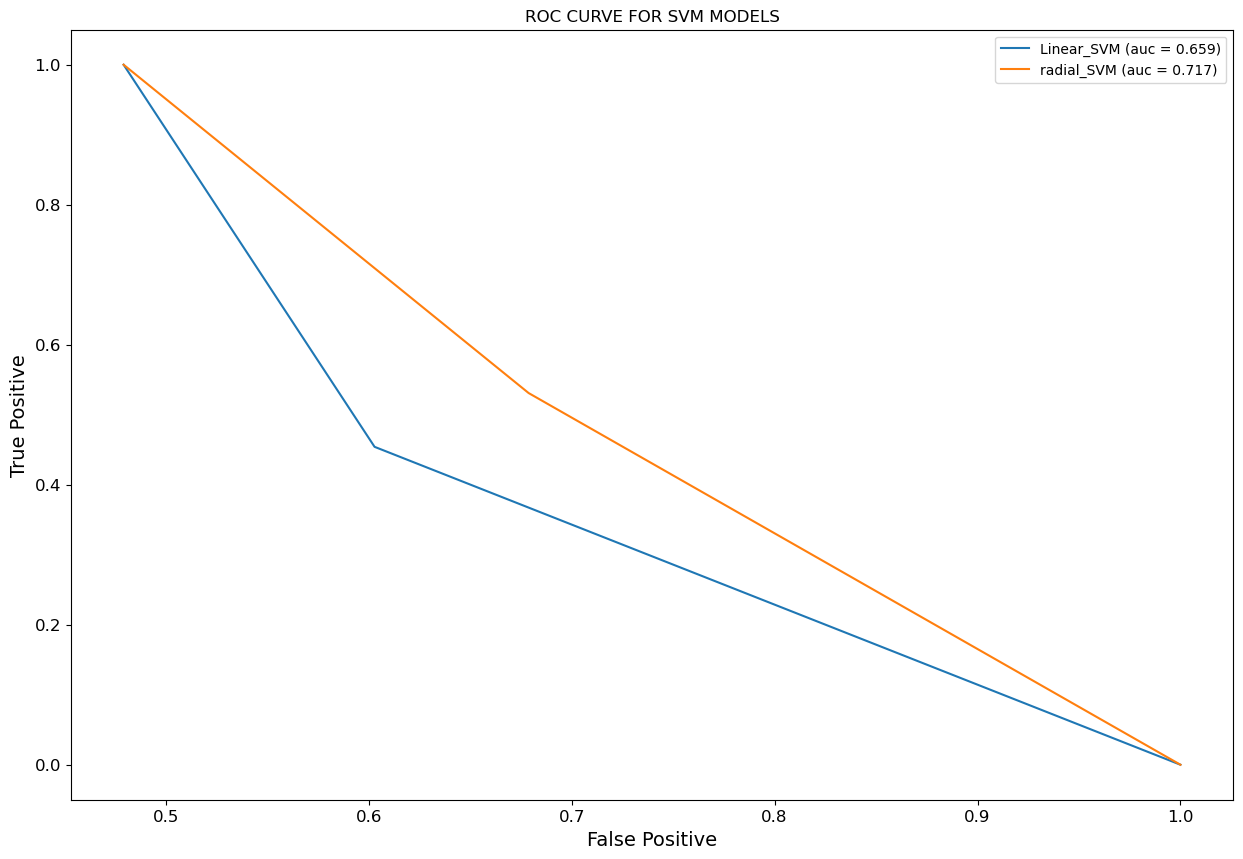

In [76]:
# define figure size
plt.figure(figsize=(15,10))

# plot ROC for all the models
plt.plot(svm_precission, svm_recall, linestyle = "-", label = "Linear_SVM (auc = %0.3f)"% svm_auc)
plt.plot(rad_svm_precission, rad_svm_recall, linestyle = "-", label = "radial_SVM (auc = %0.3f)"% rad_svm_auc)

plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC CURVE FOR SVM MODELS")
plt.legend()

From the above graph it is clear that 71.7% of the data in radial kernel and 65.9% of data in linear kernel are under the curve which defines that radial kernel is better to classify the damage with respect to the input variables.

Comparing the performance of all three kernels it is clear that best performancy and working is given by the kernel model, therefore, we can say the hyperplane that is created by the model is build at the radial kernel with 65.5%.

## MODEL 2 - NAIVE BAYES

To train the data, lets first split the data into 80 percent as training set and 20 percent foe testing and use the training data to train a NB classifier with Gaussian distribution.
 

In [78]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [79]:
clf.score(X_train,y_train)

0.5602902160376848

In [80]:
clf.score(X_test,y_test)

0.5608488523170203

The accuracy of training set and test set are similar but the accuracy is a bit low. Lets now try and train the target variable against the feature variable based on the correlation matrix and features that have a good correlation with the target variable. 

In [84]:
X1 = data[["DURATION","slope","LULC","year","month"]]
y1 = data['DAMAGE_CLASS']

In [85]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 0)

clf1=GaussianNB()
clf1.fit(X1_train,y1_train)

GaussianNB()

In [86]:
clf1.score(X1_train,y1_train)

0.7059617851596787

In [87]:
clf1.score(X1_test,y1_test)

0.7040237645152579

Therefore the model is almost 70% accurate. Hence, it is not a bad model. 

Lets predict the accuracy based on the confusion matrix

In [91]:
y_pred=clf1.predict(X1_test)

In [92]:
confusion_matrix(y1_test,y_pred)

array([[4968,  177],
       [2015,  246]], dtype=int64)

Lets now do the cross vallidation to check the accuracy of the dataset.

In [95]:
# Cross validation

cross_val_score(GaussianNB(),X1,y1,cv=5)

array([0.58061032, 0.69335674, 0.70874966, 0.69885213, 0.71492235])

Among the five iterrations of cross validation, the accuracy ranges between 41% and 81%.

An ROC curve can be plotted to check the accuracy by getting the true positive and false negative rate wherein true positive rate is the probability of a positive test result, conditioned on the individual truly being positive while true negative rate is the probability of a negative test result, conditioned on the individual truly being negative.

In [97]:
#ROC Curve

y_pred_prob = clf1.predict_proba(X1_test)
# Let's use the class 'fake' as the positives
probs = y_pred_prob[:,1]

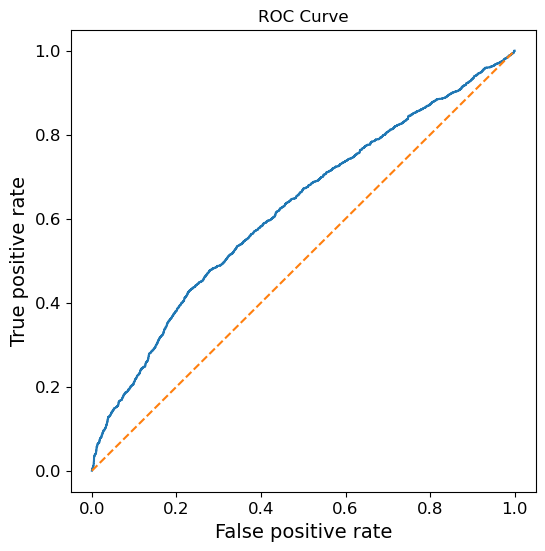

In [101]:
# use the roc_curve class to calculate the necessary values
fper, tper, thresholds = roc_curve(y1_test, probs)
# the plotting
plt.figure(figsize=(6,6))
plt.plot(fper, tper)
plt.plot([0,1], [0,1], linestyle='--')
3
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

In [102]:
# We should also calculate the area under the curve
roc_auc_score(y1_test, probs)

0.6213697938896289

The AUC is almost 62%, which is not bad. The ROC curve is not too away from the diagonal line indicating the classifier is not too bad. 
Even though The GaussianNB does not offer an intrinsic method to evaluate feature importances, Naïve Bayes method works by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability.

The reason Naive Bayes classifier was used here is because it usually performs better than other models with less training data if the assumption of independence of features holds and since the target variable did not have a major correlation with the other independent variables, this model is a good fit.




# MODEL 3 - NEURAL NETWORK

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
import torch.nn.functional as F

Firstly, converting the format of datasets (train and test) to tensors in order to utilize the PyTorch library

In [4]:
# Tensor Conversion for pytorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

So for the Neural Network model, we will define three main functions, (i) Neural Network - which is the main architecture of the model; (ii) Training function - which will input model(neural network), training and test sets, as well as learning rate and epochs, and (iii) Evaluation function - this will compute the accuracies on training and validation sets.

For the neural network architecture, we define two layers, (i) input layer - which takes in 10 inputs (from 10 different variables) and (ii) output layer - which gives single output. Since, the data seems to perform well with linear classifiers (as observed from the previous models - SVM and Naive Bayes), we will use sigmoid activation for the layers and evaluate the results using the values of loss function and evaluation metrics as follows:

In [5]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, 10) # input layer with 10 neurons
        self.layer2 = nn.Linear(10, 1) # outout layer with one neuron

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x)) # sigmoid activations for the layers
        x = torch.sigmoid(self.layer2(x))
        return x

# Training function
def train_model(model, X_train_tensor, y_train_tensor, lr=0.01, epochs=7000):
    criterion = nn.BCELoss() # cross entropy loss
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9) # stochastic gradient descent optimizer

    train_losses = [] # intitializing empty list to compute training loss values for different epochs for further use

    # computing loss for each epoch
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        train_losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
    return train_losses

# Evaluation function
def evaluate_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        # Predictions for test data
        test_outputs = model(X_test_tensor) 
        test_predicted = (test_outputs >= 0.5).float()
        
        # Predictions for train data
        train_outputs = model(X_train_tensor)
        train_predicted = (train_outputs >= 0.5).float()

    # Accuracy calculations
    test_accuracy = accuracy_score(y_test_tensor, test_predicted)
    train_accuracy = accuracy_score(y_train_tensor, train_predicted)
    
    # Only computing confusion matrix for test data
    conf_matrix = confusion_matrix(y_test_tensor, test_predicted)
    
    return train_accuracy, test_accuracy, conf_matrix

Now that the functions are defined, we can start training the models. We will initialize different learning rates to models and check the model's performance.

In [6]:
# Instantiate and train models
input_dim = X_train_tensor.shape[1]

Model with LR=0.01:
Training Accuracy: 0.9528
Testing Accuracy: 0.9506
[[2304  101]
 [ 127 2086]]
----------------------------------------


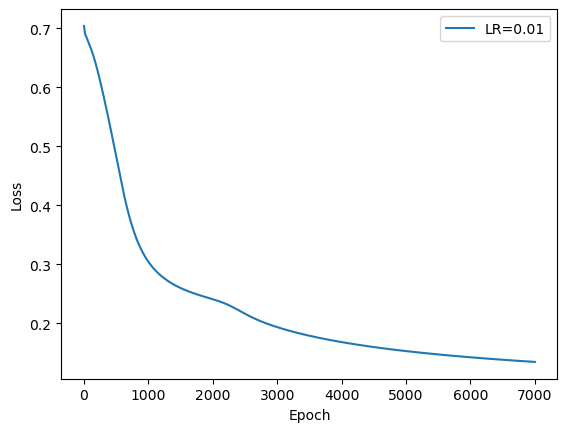

In [7]:
# Training model 1 for learning rate = 0.01
model1 = NeuralNetwork(input_dim)
train_losses1 = train_model(model1, X_train_tensor, y_train_tensor, lr=0.01)

train_accuracy1, test_accuracy1, conf_matrix1 = evaluate_model(model1, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

print(f"Model with LR=0.01:\nTraining Accuracy: {train_accuracy1:.4f}\nTesting Accuracy: {test_accuracy1:.4f}")
print(conf_matrix1)
print("-"*40)

plt.plot(train_losses1, label='LR=0.01')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The first model itself yeilds good results with a low loss and a high accuracy on train and test set both. Let's evaluate the model on a slightly higher learning rate to see its performance.

Model with LR=0.1:
Training Accuracy: 0.9834
Testing Accuracy: 0.9788
[[2345   60]
 [  38 2175]]
----------------------------------------


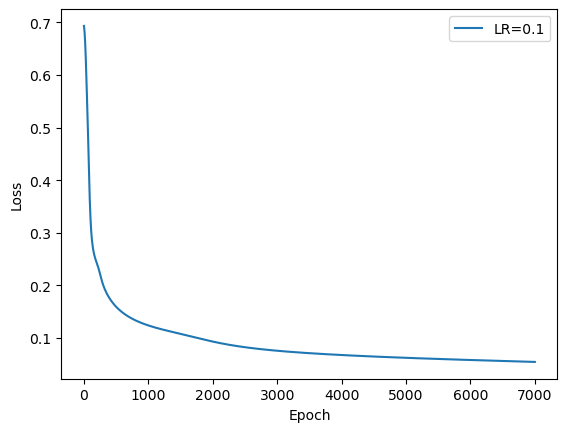

In [8]:
# Training model 2 for learning rate = 0.1
model2 = NeuralNetwork(input_dim)
train_losses2 = train_model(model2, X_train_tensor, y_train_tensor, lr=0.1)
#train_losses2

train_accuracy2, test_accuracy2, conf_matrix2 = evaluate_model(model2, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

print(f"Model with LR=0.1:\nTraining Accuracy: {train_accuracy2:.4f}\nTesting Accuracy: {test_accuracy2:.4f}")
print(conf_matrix2)
print("-"*40)

plt.plot(train_losses2, label='LR=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model with LR=1:
Training Accuracy: 0.9863
Testing Accuracy: 0.9812
[[2351   54]
 [  33 2180]]
----------------------------------------


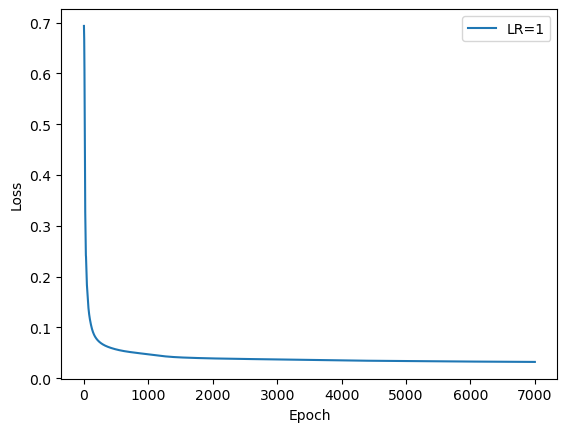

In [9]:
# Training model 3 for learning rate = 1
model3 = NeuralNetwork(input_dim)
train_losses3 = train_model(model3, X_train_tensor, y_train_tensor, lr=1)

train_accuracy3, test_accuracy3, conf_matrix3 = evaluate_model(model3, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
print(f"Model with LR=1:\nTraining Accuracy: {train_accuracy3:.4f}\nTesting Accuracy: {test_accuracy3:.4f}")
print(conf_matrix3)
print("-"*40)

plt.plot(train_losses3, label='LR=1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can see that with learning rate increased to 1, the convergence becomes faster. This looks like a potential overfitting case, that is, the model might be overshooting the loss function.

Model with LR=2:
Training Accuracy: 0.9875
Testing Accuracy: 0.9794
[[2350   55]
 [  40 2173]]
----------------------------------------


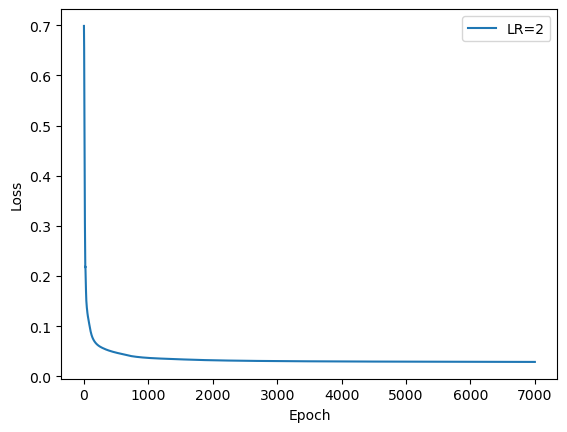

In [11]:
# Training model 4 for learning rate = 2
model4 = NeuralNetwork(input_dim)
train_losses4 = train_model(model4, X_train_tensor, y_train_tensor, lr=2)

train_accuracy4, test_accuracy4, conf_matrix4 = evaluate_model(model4, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
print(f"Model with LR=2:\nTraining Accuracy: {train_accuracy4:.4f}\nTesting Accuracy: {test_accuracy4:.4f}")
print(conf_matrix4)
print("-"*40)

plt.plot(train_losses4, label='LR=2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

For learning rate = 2,the convergence seems even quicker showing that the train data might be overfitting at this point. If we look at the accuracies of the model, we can see that model 1 with alpha = 0.01 yields the lowest test accuracy of about 95%. For the next model, at alpha = 0.1, the accuracy jumps a little and reaches approximate;y 97% on the test set which is followed by almost similar looking accuracies of model 3 and 4. This can be seen as situation of convergence at high learning rates ( alpha = 1 and 2 in this case).

Now, let's compare the different curves and look for the best model:

###### Best Model selection:

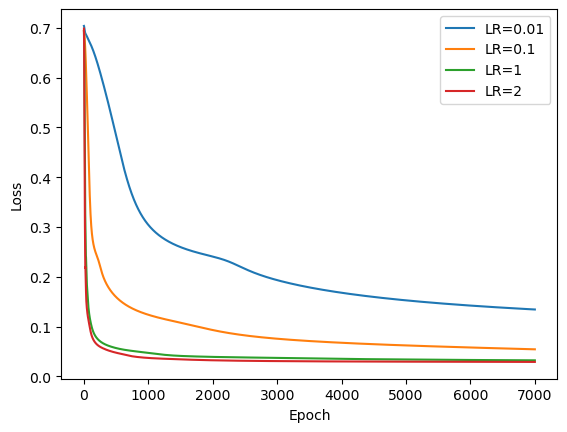

In [12]:
# Plotting the training losses for the models 1,2,3,4 at learning rates = 0.01, 0.1, 1, and 2
plt.plot(train_losses1, label='LR=0.01')
plt.plot(train_losses2, label='LR=0.1')
plt.plot(train_losses3, label='LR=1')
plt.plot(train_losses4, label='LR=2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

By looking at the above plot, we can tell that the converging rate for α(learning rate) = 0.01 is slow as compared to the other α values. It takes a long time to converge and also gives the highest loss as compared to others. On the other hand, the α values of 1 and 2 converge almost immediately (after about 10-30) epochs, suggesting that it might be surpassing the minimum of the loss function. So, α = 0.1 seems like the most suitable learning rate for the model for now. 

To evaluate further, let's plot the test accuracies of the models with respect to the learning rates as follows:

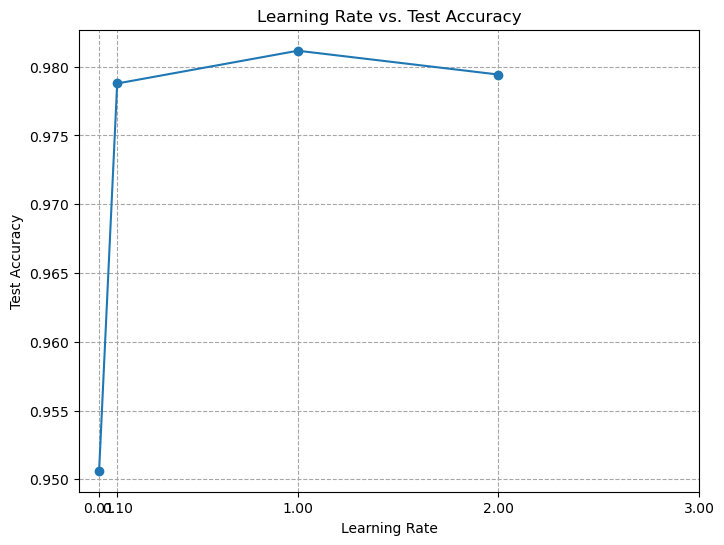

In [13]:
learning_rates = [0.01, 0.1, 1, 2]
test_accuracies = [test_accuracy1, test_accuracy2, test_accuracy3, test_accuracy4]

plt.figure(figsize=(8,6))
plt.plot(learning_rates, test_accuracies, marker='o', linestyle='-')
#plt.xscale('log')  # Since learning rates can vary by orders of magnitude, a log scale might be more informative.
plt.xlabel('Learning Rate')
plt.xticks([0.01, 0.1, 1, 2, 3])  # Setting the x-axis ticks
plt.ylabel('Test Accuracy')
plt.title('Learning Rate vs. Test Accuracy')
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()

From the above plot, we can see that test accuracies steeply increases before the learning rate reaches 1 and saturates for the higher values of the learning rate. This is indicative of the fact that smaller learning rates allow the model to converge more accurately. The saturation for the larger alpha values account for the fact that the model diverges at high learning rates, missing the optimal region.

Now, lets compare the ROC curves for the models:

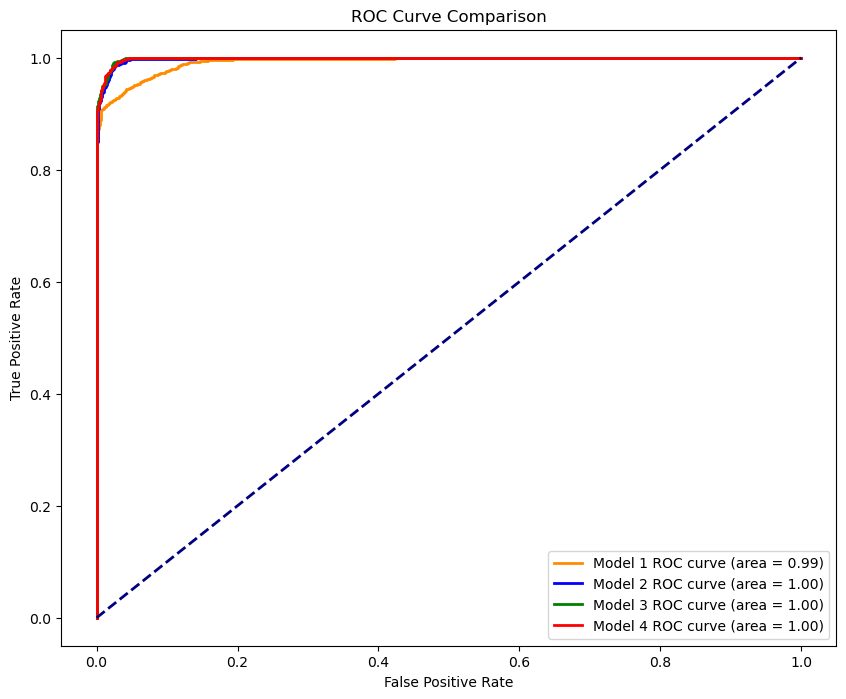

In [14]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

models = [model1, model2, model3, model4]
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]
colors = ['darkorange', 'blue', 'green', 'red']
lw = 2

plt.figure(figsize=(10,8))

for i, model in enumerate(models):
    model.eval()  # setting the model to evaluation mode
    with torch.no_grad():
        probabilities = model(X_test_tensor).numpy()

    fpr, tpr, _ = roc_curve(y_test_tensor.numpy(), probabilities)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=colors[i], lw=lw, label=f'{model_names[i]} ROC curve (area = {roc_auc:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

The AUC (area under curve) for Models 2,3, and 4 (for alpha = 0.1,1,2)  give perfect score of 1, suggesting that they are perfect classifiers. However, it might also be a result of overfitting in case of models 3 and 4 (alphas = 1,2) as suggested from the previous analysis.

Let's look at the recall-precision curve for Models:

ROC AUC for model1: 0.9921200842122666
ROC AUC for model2: 0.9974745714465552
ROC AUC for model3: 0.9987873583897081
ROC AUC for model4: 0.9986881525064987


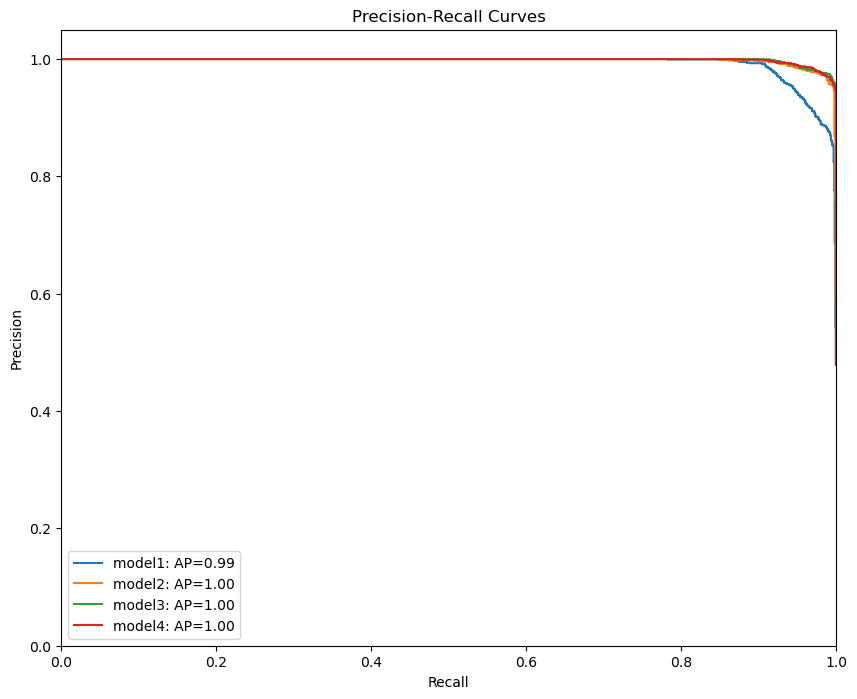

In [15]:
from sklearn.metrics import roc_auc_score

# Assuming you have models: model1, model2, model3, model4
models = [model1, model2, model3, model4]
model_names = ['model1', 'model2', 'model3', 'model4']

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():
        probabilities = model(X_test_tensor).numpy()
    
    # Calculate ROC AUC value
    roc_auc = roc_auc_score(y_test_tensor.numpy(), probabilities)
    
    # Print ROC AUC value for each model
    print(f"ROC AUC for {name}: {roc_auc:}")
    
    precision, recall, _ = precision_recall_curve(y_test_tensor.numpy(), probabilities)
    average_precision = average_precision_score(y_test_tensor.numpy(), probabilities)

    plt.step(recall, precision, where='post', label='{0}: AP={1:0.2f}'.format(name, average_precision))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

Once again, the models 2,3,4 ( alpha = 0.1,1,2) give high values for for both precision and recall with AUC-PR at 99.74%, 99.87%, and 99.86% respectively. This indicates a good model performance, especially for model 2 (alpha = 0.1) which has yielded best **overall** results among all models that have been compared so far.

###### Selected Model: 
Hence, the selected model is Model 2 with alpha = 0.1. This model performs well on all our evaluation parameters and yields a final accuracy of 98.34% on the training data and 97.88% on the testing dataset.

# Model Comparisions

For comparing the models we check the performance of all three models and select the model with highest accuracy and lowest error rate. The accuracy rate on test set is:

SVC with Radial Kernel  - 65.5%

Naive Bayes             - 70.40%

Neural Network          - 97.88%

The accuracy of the neural network is highest as compare to other two models. It shows that whenever a new data is added to the dataset it is assumed that the model give accurate values 97.99% of times.
On the bases of the misclassification error we can say that SVC with radial kernel is least helpful that shows that 34.5% of the time when the damage by the flood is high the model will predict that the damage is low which is the biggest drawback for a model. 